In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pickle

In [3]:
import pandas as pd
import glob

path = r'D:\MIS\Research\Data Analytics\TOI_Customer\TOI_DP\Input_Data\result' # use your path
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)

In [5]:
frame.dtypes

CUSTOMER_CDE             int64
SUB_INDUSTRY_CDE         int64
CUS_TARGET_CDE           int64
CUSTOMER_STATUS_CDE      int64
GENDER_CDE              object
PROVINCE_CDE           float64
MARITAL_STATUS          object
BANK_RELATION            int64
AGE                      int64
TOI_DP_2018            float64
TOI_DP_2017            float64
TOI_DP_2016            float64
LAISUAT                float64
KYHAN                   object
CURRENCY_CDE            object
dtype: object

In [6]:
frame.shape

(5714729, 15)

In [7]:
frame.head()

,CUSTOMER_CDE,SUB_INDUSTRY_CDE,CUS_TARGET_CDE,CUSTOMER_STATUS_CDE,GENDER_CDE,PROVINCE_CDE,MARITAL_STATUS,BANK_RELATION,AGE,TOI_DP_2018,TOI_DP_2017,TOI_DP_2016,LAISUAT,KYHAN,CURRENCY_CDE
0,10000001,1571,2001,1001,MALE,5000.0,MARRIED,5,31,351595.584895,248333.333484,NaN,0.3,NonTerm,VND
1,10000001,1571,2001,1001,MALE,5000.0,MARRIED,5,31,351595.584895,248333.333484,NaN,6.9,12M,VND
2,10000002,7311,2001,1001,MALE,5000.0,SINGLE,5,21,3001.009660,490619.771046,NaN,0.3,NonTerm,VND
3,10000003,7311,2001,1001,MALE,3600.0,MARRIED,5,57,NaN,120293.333331,18055.555555,NaN,NaN,NaN
4,10000004,7311,2001,1001,FEMALE,5000.0,SINGLE,8,22,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
frame.isnull().sum()

CUSTOMER_CDE                 0
SUB_INDUSTRY_CDE             0
CUS_TARGET_CDE               0
CUSTOMER_STATUS_CDE          0
GENDER_CDE                   0
PROVINCE_CDE             20085
MARITAL_STATUS               0
BANK_RELATION                0
AGE                          0
TOI_DP_2018            2435065
TOI_DP_2017            2836142
TOI_DP_2016            3500001
LAISUAT                2435074
KYHAN                  2435065
CURRENCY_CDE           2435065
dtype: int64

In [7]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5714729 entries, 0 to 5714728
Data columns (total 15 columns):
CUSTOMER_CDE           int64
SUB_INDUSTRY_CDE       int64
CUS_TARGET_CDE         int64
CUSTOMER_STATUS_CDE    int64
GENDER_CDE             object
PROVINCE_CDE           float64
MARITAL_STATUS         object
BANK_RELATION          int64
AGE                    int64
TOI_DP_2018            float64
TOI_DP_2017            float64
TOI_DP_2016            float64
LAISUAT                float64
KYHAN                  object
CURRENCY_CDE           object
dtypes: float64(5), int64(6), object(4)
memory usage: 654.0+ MB


In [8]:
frame.describe()

,CUSTOMER_CDE,SUB_INDUSTRY_CDE,CUS_TARGET_CDE,CUSTOMER_STATUS_CDE,PROVINCE_CDE,BANK_RELATION,AGE,TOI_DP_2018,TOI_DP_2017,TOI_DP_2016,LAISUAT
count,5.714729e+06,5.714729e+06,5.714729e+06,5.714729e+06,5.694644e+06,5.714729e+06,5.714729e+06,3.279664e+06,2.575235e+06,1.890424e+06,3.279655e+06
mean,8.005662e+06,4.465514e+03,1.879517e+03,1.175845e+03,5.817467e+03,5.588313e+00,3.656370e+01,2.059285e+06,1.539648e+06,1.780025e+06,1.674292e+00
std,3.482138e+06,2.485195e+03,3.309288e+02,4.315132e+02,1.823726e+03,1.206202e+00,1.381305e+01,1.612736e+07,1.236769e+07,1.418260e+07,2.467813e+00
min,3.000000e+00,1.000000e+01,1.001000e+03,1.000000e+01,1.000000e+03,-1.000000e+00,0.000000e+00,-3.352166e+07,-5.091580e+07,-1.978461e+07,0.000000e+00
25%,5.677730e+06,3.012000e+03,2.001000e+03,1.001000e+03,5.000000e+03,5.000000e+00,2.700000e+01,3.246093e+03,3.106786e+03,3.500383e+03,3.000000e-01
50%,8.636364e+06,4.243000e+03,2.001000e+03,1.001000e+03,5.800000e+03,5.000000e+00,3.400000e+01,4.167539e+04,3.569994e+04,3.983998e+04,3.000000e-01
75%,1.094900e+07,7.311000e+03,2.001000e+03,1.005000e+03,7.200000e+03,5.000000e+00,4.500000e+01,7.160463e+05,5.122241e+05,5.133652e+05,3.000000e-01
max,3.106413e+08,9.001000e+03,9.999000e+03,9.999000e+03,9.900000e+03,1.000000e+01,1.019000e+03,5.972468e+09,3.808193e+09,4.817094e+09,5.050000e+02


In [45]:
frame[frame.TOI_DP_2018<0].count()

CUSTOMER_CDE           12211
SUB_INDUSTRY_CDE       12211
CUS_TARGET_CDE         12211
CUSTOMER_STATUS_CDE    12211
GENDER_CDE             12211
PROVINCE_CDE           12211
MARITAL_STATUS         12211
BANK_RELATION          12211
AGE                    12211
TOI_DP_2018            12211
TOI_DP_2017             5298
TOI_DP_2016             1937
LAISUAT                12211
KYHAN                  12211
CURRENCY_CDE           12211
dtype: int64

In [11]:
frame[(frame.TOI_DP_2018<0) & (frame.TOI_DP_2017<0) & (frame.TOI_DP_2016<0)].head()

,CUSTOMER_CDE,SUB_INDUSTRY_CDE,CUS_TARGET_CDE,CUSTOMER_STATUS_CDE,GENDER_CDE,PROVINCE_CDE,MARITAL_STATUS,BANK_RELATION,AGE,TOI_DP_2018,TOI_DP_2017,TOI_DP_2016,LAISUAT,KYHAN,CURRENCY_CDE
3966,10006519,424,1001,2001,MALE,5000.0,SINGLE,5,31,-4.329299e+04,-5.880278e+04,-9.563750e+03,0.3,NonTerm,VND
3967,10006519,424,1001,2001,MALE,5000.0,SINGLE,5,31,-4.329299e+04,-5.880278e+04,-9.563750e+03,6.9,12M,VND
2298715,2151251,424,2001,1001,FEMALE,4100.0,MARRIED,5,56,-2.169210e+06,-1.588957e+06,-7.727950e+05,0.3,NonTerm,VND
2298716,2151251,424,2001,1001,FEMALE,4100.0,MARRIED,5,56,-2.169210e+06,-1.588957e+06,-7.727950e+05,6.9,12M,VND
2830243,4078783,7311,2001,51,MALE,4100.0,MARRIED,5,50,-4.686393e+06,-3.699065e+06,-3.469330e+06,6.9,12M,VND


In [5]:
df = frame

In [13]:
g = df.groupby('KYHAN')
g.groups.keys()

dict_keys(['100M', '105M', '108M', '10M', '110M', '111M', '114M', '117M', '118M', '11M', '120M', '12M', '13M', '14M', '15M', '16M', '18M', '19M', '1M', '1W', '20M', '22M', '23M', '24M', '25M', '26M', '27M', '28M', '2M', '2W', '30M', '32M', '33M', '34M', '35M', '36M', '3M', '3W', '42M', '43M', '44M', '46M', '47M', '48M', '49M', '4M', '51M', '58M', '59M', '5M', '60M', '62M', '6M', '70M', '72M', '7M', '82M', '84M', '85M', '86M', '8M', '90M', '96M', '98M', '99M', '9M', '>10Y', 'NonTerm'])

In [6]:
df['TOIDP_CLASS'] = 0

In [7]:
df.loc[df.TOI_DP_2018.isnull()==False,'TOIDP_CLASS'] = 1

In [8]:
g = df.groupby('TOIDP_CLASS')
g.groups.keys()

dict_keys([0, 1])

In [9]:
df.groupby('TOIDP_CLASS')['TOIDP_CLASS'].count().reset_index(name='count').sort_values(['count'],ascending=False).head()

,TOIDP_CLASS,count
1,1,3279664
0,0,2435065


In [10]:
df.isnull().sum()

CUSTOMER_CDE                 0
SUB_INDUSTRY_CDE             0
CUS_TARGET_CDE               0
CUSTOMER_STATUS_CDE          0
GENDER_CDE                   0
PROVINCE_CDE             20085
MARITAL_STATUS               0
BANK_RELATION                0
AGE                          0
TOI_DP_2018            2435065
TOI_DP_2017            2836142
TOI_DP_2016            3500001
LAISUAT                2435074
KYHAN                  2435065
CURRENCY_CDE           2435065
TOIDP_CLASS                  0
dtype: int64

In [14]:
df.groupby('PROVINCE_CDE')['PROVINCE_CDE'].count().reset_index(name='count').sort_values(['count'],ascending=False).head()

,PROVINCE_CDE,count
43,5000.0,1291101
78,6800.0,230816
81,7200.0,196716
0,1000.0,182367
87,8000.0,170480


In [11]:
# df["PROVINCE_CDE"].fillna(5000.0, inplace = True)
df["PROVINCE_CDE"].fillna(method='ffill', inplace = True)

In [12]:
df['HISTORY_TOIDP'] = 0

In [13]:
df.loc[(df.TOI_DP_2016.isnull()==False) & (df.TOI_DP_2017.isnull()==False),'HISTORY_TOIDP'] = 2
df.loc[(df.TOI_DP_2016.isnull()==True) & (df.TOI_DP_2017.isnull()==False),'HISTORY_TOIDP'] = 1
df.loc[(df.TOI_DP_2016.isnull()==False) & (df.TOI_DP_2017.isnull()==True),'HISTORY_TOIDP'] = 1

In [14]:
g = df.groupby('HISTORY_TOIDP')
g.groups.keys()

dict_keys([0, 1, 2])

In [15]:
df[df.HISTORY_TOIDP==2].count()

CUSTOMER_CDE           2078075
SUB_INDUSTRY_CDE       2078075
CUS_TARGET_CDE         2078075
CUSTOMER_STATUS_CDE    2078075
GENDER_CDE             2078075
PROVINCE_CDE           2078075
MARITAL_STATUS         2078075
BANK_RELATION          2078075
AGE                    2078075
TOI_DP_2018            1873930
TOI_DP_2017            2078075
TOI_DP_2016            2078075
LAISUAT                1873928
KYHAN                  1873930
CURRENCY_CDE           1873930
TOIDP_CLASS            2078075
HISTORY_TOIDP          2078075
dtype: int64

In [16]:
#data_class = df[['SUB_INDUSTRY_CDE','CUS_TARGET_CDE','CUSTOMER_STATUS_CDE','GENDER_CDE','PROVINCE_CDE','MARITAL_STATUS','BANK_RELATION','AGE','HISTORY_TOIDP','TOIDP_CLASS']]
data_class = df[['SUB_INDUSTRY_CDE','CUS_TARGET_CDE','GENDER_CDE','PROVINCE_CDE','MARITAL_STATUS','BANK_RELATION','AGE','HISTORY_TOIDP','TOIDP_CLASS']]

In [17]:
data_class.isnull().sum()

SUB_INDUSTRY_CDE    0
CUS_TARGET_CDE      0
GENDER_CDE          0
PROVINCE_CDE        0
MARITAL_STATUS      0
BANK_RELATION       0
AGE                 0
HISTORY_TOIDP       0
TOIDP_CLASS         0
dtype: int64

In [18]:
data_class.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5714729 entries, 0 to 5714728
Data columns (total 9 columns):
SUB_INDUSTRY_CDE    int64
CUS_TARGET_CDE      int64
GENDER_CDE          object
PROVINCE_CDE        float64
MARITAL_STATUS      object
BANK_RELATION       int64
AGE                 int64
HISTORY_TOIDP       int64
TOIDP_CLASS         int64
dtypes: float64(1), int64(6), object(2)
memory usage: 392.4+ MB


In [19]:
data_class.head()

,SUB_INDUSTRY_CDE,CUS_TARGET_CDE,GENDER_CDE,PROVINCE_CDE,MARITAL_STATUS,BANK_RELATION,AGE,HISTORY_TOIDP,TOIDP_CLASS
0,1571,2001,MALE,5000.0,MARRIED,5,31,1,1
1,1571,2001,MALE,5000.0,MARRIED,5,31,1,1
2,7311,2001,MALE,5000.0,SINGLE,5,21,1,1
3,7311,2001,MALE,3600.0,MARRIED,5,57,2,0
4,7311,2001,FEMALE,5000.0,SINGLE,8,22,0,0


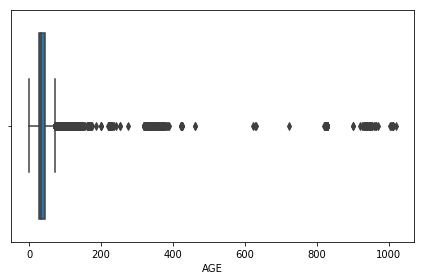

In [31]:
# fig, axs = plt.subplots(1, figsize = (10,20))
fig, axs = plt.subplots(1, 1)
plt1 = sns.boxplot(data_class['AGE'], ax = axs)
plt.tight_layout()

In [34]:
data_class.groupby('AGE')['AGE'].count().reset_index(name='count').sort_values(['AGE'],ascending=True)

,AGE,count
0,0,593
1,1,1877
2,2,3135
3,3,5349
4,4,7739
5,5,8597
6,6,9918
7,7,9401
8,8,7832
9,9,8359


In [76]:
data_class[(data_class.AGE<=20) & (data_class.AGE>=0)].count()

SUB_INDUSTRY_CDE       363036
CUS_TARGET_CDE         363036
CUSTOMER_STATUS_CDE    363036
GENDER_CDE             363036
PROVINCE_CDE           363036
MARITAL_STATUS         363036
BANK_RELATION          363036
AGE                    363036
TOIDP_CLASS            363036
dtype: int64

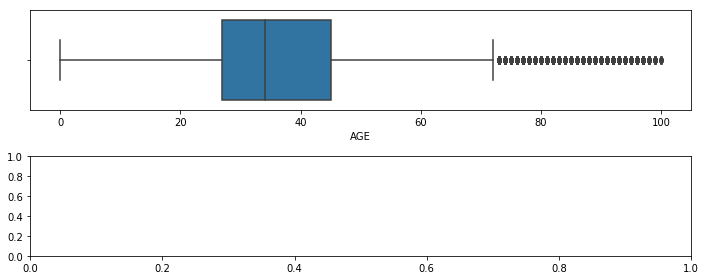

In [24]:

# Outlier Analysis
fig, axs = plt.subplots(2, figsize = (10,4))
plt1 = sns.boxplot(data_class['AGE'], ax = axs[0])
plt.tight_layout()

In [20]:
median = data_class.loc[data_class['AGE']<=100,'AGE'].median()
data_class['AGE'] = np.where(data_class['AGE'] > 100,median,data_class['AGE'])

C:\WPy-3710\python-3.7.1.amd64\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [21]:
data_class.groupby('MARITAL_STATUS').count()

,SUB_INDUSTRY_CDE,CUS_TARGET_CDE,GENDER_CDE,PROVINCE_CDE,BANK_RELATION,AGE,HISTORY_TOIDP,TOIDP_CLASS
MARITAL_STATUS,,,,,,,,
DIVORCED,2127,2127,2127,2127,2127,2127,2127,2127
IM1421703562,1,1,1,1,1,1,1,1
MARRIED,3903157,3903157,3903157,3903157,3903157,3903157,3903157,3903157
OTHER,18958,18958,18958,18958,18958,18958,18958,18958
PARTNER,760,760,760,760,760,760,760,760
SINGLE,1789683,1789683,1789683,1789683,1789683,1789683,1789683,1789683
WIDOWED,43,43,43,43,43,43,43,43


In [22]:
data_class.loc[(data_class.MARITAL_STATUS=='IM1421703562'),'MARITAL_STATUS']='OTHER'

C:\WPy-3710\python-3.7.1.amd64\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [23]:
from sklearn import preprocessing 
le = preprocessing.LabelEncoder()

In [24]:
data_class['GENDER_CDE'] = le.fit_transform(data_class['GENDER_CDE'])

C:\WPy-3710\python-3.7.1.amd64\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [25]:
data_class['MARITAL_STATUS'] = le.fit_transform(data_class['MARITAL_STATUS'])

C:\WPy-3710\python-3.7.1.amd64\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [26]:
data_class.groupby('MARITAL_STATUS').sum()

,SUB_INDUSTRY_CDE,CUS_TARGET_CDE,GENDER_CDE,PROVINCE_CDE,BANK_RELATION,AGE,HISTORY_TOIDP,TOIDP_CLASS
MARITAL_STATUS,,,,,,,,
0,9361759,3511241,760,1.120000e+07,10470,85487.0,2347,1085
1,17122738298,7337811733,1856929,2.261430e+10,21874517,162272582.0,3520995,2214499
2,80125481,36052244,9314,1.128192e+08,93826,621727.0,18799,7865
3,2328812,1469889,357,4.643200e+06,3765,28801.0,688,278
4,8304405968,3362001864,929558,1.048127e+10,9952903,45720155.0,1550460,1055927
5,244887,82134,6,2.662000e+05,215,2280.0,26,10


In [27]:
#Randomforest method
X = data_class.drop('TOIDP_CLASS', axis=1)  
y = data_class['TOIDP_CLASS'] 

In [28]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
print(X_train.shape, y_train.size)
print(X_test.shape, y_test.shape)

(4571783, 8) 4571783
(1142946, 8) (1142946,)


## Cách 1: Xây dựng mô hình phân lớp  Random Forest

In [29]:
import xgboost as xgb
from xgboost import XGBClassifier
clf = XGBClassifier(learning_rate=0.1, n_estimators=140, max_depth=5,
                        min_child_weight=3, gamma=0.2, subsample=0.6, colsample_bytree=1.0,
                        objective='binary:logistic', nthread=4, scale_pos_weight=1, seed=27)

In [30]:
print('Start Training')
clf.fit(X_train, y_train, eval_metric='auc')

Start Training
[14:11:00] WARNING: D:\Build\xgboost\xgboost-0.90.git\src\learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1.0, gamma=0.2,
       learning_rate=0.1, max_delta_step=0, max_depth=5,
       min_child_weight=3, missing=None, n_estimators=140, n_jobs=1,
       nthread=4, objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=27, silent=None,
       subsample=0.6, verbosity=1)

In [31]:
y_pred = clf.predict(X_test)
y_pred

array([0, 0, 1, ..., 0, 1, 0], dtype=int64)

In [32]:
y_test.values.shape

(1142946,)

In [34]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test.values, y_pred)

0.8306945384996317

In [35]:
# accuracy của model on testing set
accuracy_score = clf.score(X_test, y_test)
print(f"Random Forest classifier accuracy score for training set is {accuracy_score}")

Random Forest classifier accuracy score for training set is 0.8306945384996317


In [36]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))  

[[369785 116931]
 [ 76576 579654]]
              precision    recall  f1-score   support

           0       0.83      0.76      0.79    486716
           1       0.83      0.88      0.86    656230

   micro avg       0.83      0.83      0.83   1142946
   macro avg       0.83      0.82      0.82   1142946
weighted avg       0.83      0.83      0.83   1142946



In [35]:
#Tạo Series object để thấy feature nào quan trọng
feature_imp = pd.Series(clf.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feature_imp

BANK_RELATION          0.617250
HISTORY_TOIDP          0.334671
SUB_INDUSTRY_CDE       0.011570
AGE                    0.009469
MARITAL_STATUS         0.009433
CUS_TARGET_CDE         0.005728
CUSTOMER_STATUS_CDE    0.005659
PROVINCE_CDE           0.004731
GENDER_CDE             0.001490
dtype: float32

No handles with labels found to put in legend.


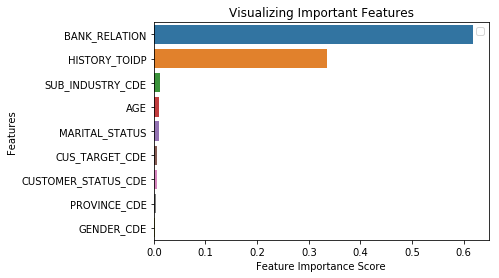

In [36]:
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [ ]:
filename='Xgboost_model_toidp.sav' 

pickle.dump(clf, open(filename, 'wb')) 

load_xgboost_model =pickle.load(open(filename, 'rb')) 

load_xgboost_model.coef_ 

#y_load_predit=load_xgboost_model.predict(X_test) 

In [14]:
# df[df.TOI_DP_2018>100000000].count()

CUSTOMER_CDE           6370
SUB_INDUSTRY_CDE       6370
CUS_TARGET_CDE         6370
CUSTOMER_STATUS_CDE    6370
GENDER_CDE             6370
PROVINCE_CDE           6370
MARITAL_STATUS         6370
BANK_RELATION          6370
AGE                    6370
TOI_DP_2018            6370
TOI_DP_2017            6225
TOI_DP_2016            5870
LAISUAT                6370
KYHAN                  6370
CURRENCY_CDE           6370
dtype: int64

In [64]:
# df['TOIDP_RANGE'] = pd.cut(df.TOI_DP_2018,bins=[-35000000,10000000,50000000,100000000,np.inf],labels=False, right=True)

In [69]:
# g = df.groupby('TOIDP_RANGE')
# g.groups.keys()

dict_keys([-1.0, 0.0, 1.0, 2.0, 3.0])

In [68]:
# df['TOIDP_RANGE'].isnull().sum()

0

In [67]:
# df.loc[df.TOIDP_RANGE.isnull(),'TOIDP_RANGE'] = -1

In [72]:
df[(df.TOI_DP_2018.isnull()==False) & (df.TOI_DP_2017.isnull()==True) & (df.TOI_DP_2016.isnull()==False)].count()

CUSTOMER_CDE           16494
SUB_INDUSTRY_CDE       16494
CUS_TARGET_CDE         16494
CUSTOMER_STATUS_CDE    16494
GENDER_CDE             16494
PROVINCE_CDE           16493
MARITAL_STATUS         16494
BANK_RELATION          16494
AGE                    16494
TOI_DP_2018            16494
TOI_DP_2017                0
TOI_DP_2016            16494
LAISUAT                16494
KYHAN                  16494
CURRENCY_CDE           16494
TOIDP_RANGE            16494
dtype: int64

In [ ]:
##------------------------------------------------------

In [ ]:
# frame["TOI_DP_2018"].fillna(-1, inplace = True)

In [19]:
frame.loc[frame.TOI_DP_2018<0,'TOI_DP_2018'] = 0

In [21]:
frame[frame.TOI_DP_2018==0].count()

CUSTOMER_CDE           12347
SUB_INDUSTRY_CDE       12347
CUS_TARGET_CDE         12347
CUSTOMER_STATUS_CDE    12347
GENDER_CDE             12347
PROVINCE_CDE           12347
MARITAL_STATUS         12347
BANK_RELATION          12347
AGE                    12347
TOI_DP_2018            12347
TOI_DP_2017             5358
TOI_DP_2016             1980
LAISUAT                12346
KYHAN                  12347
CURRENCY_CDE           12347
dtype: int64

In [26]:
frame.loc[frame.TOI_DP_2018.isnull(),'TOI_DP_2018'] = -1
frame.loc[frame.KYHAN.isnull(),'KYHAN'] = -1
frame.loc[frame.CURRENCY_CDE.isnull(),'CURRENCY_CDE'] = -1

In [29]:
frame[frame.TOI_DP_2018==-1].count()

CUSTOMER_CDE           2435065
SUB_INDUSTRY_CDE       2435065
CUS_TARGET_CDE         2435065
CUSTOMER_STATUS_CDE    2435065
GENDER_CDE             2435065
PROVINCE_CDE           2415223
MARITAL_STATUS         2435065
BANK_RELATION          2435065
AGE                    2435065
TOI_DP_2018            2435065
TOI_DP_2017                  0
TOI_DP_2016                  0
LAISUAT                2435065
KYHAN                  2435065
CURRENCY_CDE           2435065
dtype: int64

In [28]:
frame.loc[frame.TOI_DP_2018==-1,'LAISUAT'] = -1

In [31]:
di = {'100M':'100', '105M':'105', '108M':'108', '10M':'10', '110M':'110', '111M':'111', '114M':'114', '117M':'117', '118M':'118', '11M':'11', '120M':'120', '12M':'12', '13M':'13', '14M':'14', '15M':'15', '16M':'16', '18M':'18', '19M':'19', 
      '1M':'1', '1W':'0.25', '20M':'20', '21M':'21', '22M':'22', '23M':'23', '24M':'24', '25M':'25', '26M':'26', '27M':'27', '28M':'28', '2M':'2', '2W':'0.5', '30M':'30', '32M':'32', '33M':'33', '34M':'34', '35M':'35', '36M':'36', 
      '3M':'3', '3W':'0.75', '42M':'42', '43M':'43', '44M':'44', '46M':'46', '47M':'47', '48M':'48', '49M':'49', '4M':'4', '51M':'51', '58M':'58', '59M':'59', '5M':'5', '60M':'60', '62M':'62', '6M':'6', '70M':'70', '72M':'72', 
      '7M':'7', '82M':'82', '84M':'84', '85M':'85', '86M':'86', '8M':'8', '96M':'96', '90M':'90', '98M':'98', '99M':'99', '9M':'9', '>10Y':'122', 'NonTerm':'0'}
frame['KYHAN'].replace(di, inplace=True)

In [34]:
frame.loc[frame.TOI_DP_2017<0,'TOI_DP_2017'] = 0
frame.loc[frame.TOI_DP_2016<0,'TOI_DP_2016'] = 0

In [35]:
frame.loc[frame.TOI_DP_2017.isnull(),'TOI_DP_2017'] = -1
frame.loc[frame.TOI_DP_2016.isnull(),'TOI_DP_2016'] = -1

In [36]:
frame[frame.TOI_DP_2018==-1].count()

CUSTOMER_CDE           2435065
SUB_INDUSTRY_CDE       2435065
CUS_TARGET_CDE         2435065
CUSTOMER_STATUS_CDE    2435065
GENDER_CDE             2435065
PROVINCE_CDE           2415223
MARITAL_STATUS         2435065
BANK_RELATION          2435065
AGE                    2435065
TOI_DP_2018            2435065
TOI_DP_2017            2435065
TOI_DP_2016            2435065
LAISUAT                2435065
KYHAN                  2435065
CURRENCY_CDE           2435065
dtype: int64

In [ ]:
##------------------------------------------------------

In [81]:
data = df[['SUB_INDUSTRY_CDE','CUS_TARGET_CDE','CUSTOMER_STATUS_CDE','GENDER_CDE','PROVINCE_CDE','MARITAL_STATUS','BANK_RELATION','AGE','HISTORY_TOIDP','TOIDP_RANGE']]

In [82]:
data.isnull().sum()

SUB_INDUSTRY_CDE           0
CUS_TARGET_CDE             0
CUSTOMER_STATUS_CDE        0
GENDER_CDE                 0
PROVINCE_CDE           20085
MARITAL_STATUS             0
BANK_RELATION              0
AGE                        0
HISTORY_TOIDP              0
TOIDP_RANGE                0
dtype: int64

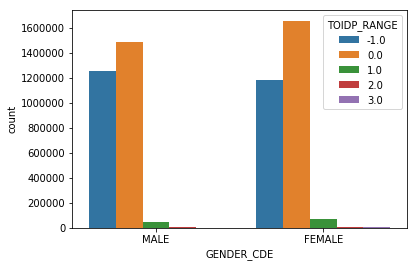

In [83]:
sns.countplot(data['GENDER_CDE'], hue=data['TOIDP_RANGE'])

In [91]:
data.groupby('PROVINCE_CDE')['PROVINCE_CDE'].count().reset_index(name='count').sort_values(['count'],ascending=False).head()

,PROVINCE_CDE,count
43,5000.0,1291101
78,6800.0,230816
81,7200.0,196716
0,1000.0,182367
87,8000.0,170480


In [93]:
data.shape

(5714729, 10)

In [94]:
data["PROVINCE_CDE"].fillna(5000.0, inplace = True)

C:\WPy-3710\python-3.7.1.amd64\lib\site-packages\pandas\core\generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [95]:
data.isnull().sum()

SUB_INDUSTRY_CDE       0
CUS_TARGET_CDE         0
CUSTOMER_STATUS_CDE    0
GENDER_CDE             0
PROVINCE_CDE           0
MARITAL_STATUS         0
BANK_RELATION          0
AGE                    0
HISTORY_TOIDP          0
TOIDP_RANGE            0
dtype: int64